# Exercise 4.2

### Import

In [2]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def scale(x):
    x /= 255
    x -= np.mean(x, axis = (1, 2)).reshape(-1, 1, 1, 1)
    x /= np.maximum(np.std(x, axis = (1, 2)).reshape(-1, 1, 1, 1), np.sqrt(x.shape[1] * x.shape[2] - 1))
    return x

In [3]:
scale = lambda x: x

### Load Data

In [4]:
path = os.getcwd()
X_cyr = scale(np.load(path + "/data/X_cyr.npy").reshape((1, 28, 28, -1)).swapaxes(0, -1))
X_lat = np.load(path + "/data/X_lat.npy").reshape((1, 28, 28, -1)).swapaxes(0, -1)
labels_cyr = np.load(path + "/data/labels_cyr.npy")
labels_lat = np.load(path + "/data/labels_lat.npy")

labels = {i : np.mean(X_lat[labels_lat == i], axis = 0) for i in range(14)}
Y_cyr = np.array([labels[i] for i in labels_cyr])

### Model

In [5]:
initializer = tf.keras.initializers.VarianceScaling
activation = lambda x: tf.keras.layers.LeakyReLU()(x)

inputs = tf.keras.layers.Input([28, 28, 1])
x = tf.keras.layers.ZeroPadding2D(padding = 2)(inputs)
x = tf.keras.layers.Conv2D(16, 7, strides = 1, padding = "same", kernel_initializer = initializer,
                           activation = activation)(x)
x = tf.keras.layers.Conv2D(32, 5, strides = 2, padding = "same", kernel_initializer = initializer,
                           activation = activation)(x)
x = tf.keras.layers.Conv2D(16, 3, strides = 1, padding = "same", kernel_initializer = initializer,
                           activation = activation)(x)
x = tf.keras.layers.Conv2D(8, 3, strides = 2, padding = "same", kernel_initializer = initializer,
                           activation = activation)(x)
x = tf.keras.layers.Conv2D(8, 3, strides = 1, padding = "same", kernel_initializer = initializer,
                           activation = activation)(x)
x = tf.keras.layers.Conv2D(4, 3, strides = 2, padding = "same", kernel_initializer = initializer,
                           activation = activation)(x)

x = tf.keras.layers.Conv2DTranspose(8, 3, strides = 2, padding = "same", kernel_initializer = initializer,
                                    activation = activation)(x)
x = tf.keras.layers.Conv2D(8, 3, strides = 1, padding = "same", kernel_initializer = initializer,
                           activation = activation)(x)
x = tf.keras.layers.Conv2DTranspose(16, 3, strides = 2, padding = "same", kernel_initializer = initializer,
                                    activation = activation)(x)
x = tf.keras.layers.Conv2D(16, 3, strides = 1, padding = "same", kernel_initializer = initializer,
                           activation = activation)(x)
x = tf.keras.layers.Conv2DTranspose(32, 5, strides = 2, padding = "same", kernel_initializer = initializer,
                                    activation = activation)(x)
x = tf.keras.layers.Conv2D(1, 7, strides = 1, padding = "same", kernel_initializer = initializer,
                           activation = tf.keras.activations.sigmoid)(x)
outputs = tf.keras.layers.Cropping2D(cropping = 2)(x)

model = tf.keras.models.Model(inputs = inputs, outputs = outputs)

In [6]:
loss = tf.keras.losses.binary_crossentropy
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer, loss)

In [7]:
model.fit(X_cyr, Y_cyr, batch_size = 250, epochs = 40, validation_split = 0.1)

Train on 5218 samples, validate on 580 samples
Epoch 1/40
5218/5218 [==============================] - 4s - loss: 0.6564 - val_loss: 0.6026
Epoch 2/40
5218/5218 [==============================] - 1s - loss: 0.6249 - val_loss: 0.5961
Epoch 3/40
5218/5218 [==============================] - 1s - loss: 0.6236 - val_loss: 0.5927
Epoch 4/40
5218/5218 [==============================] - 1s - loss: 0.6219 - val_loss: 0.5923
Epoch 5/40
5218/5218 [==============================] - 1s - loss: 0.6193 - val_loss: 0.5924
Epoch 6/40
5218/5218 [==============================] - 1s - loss: 0.6150 - val_loss: 0.5945
Epoch 7/40
5218/5218 [==============================] - 1s - loss: 0.6073 - val_loss: 0.5967
Epoch 8/40
5218/5218 [==============================] - 1s - loss: 0.6001 - val_loss: 0.5929
Epoch 9/40
5218/5218 [==============================] - 0s - loss: 0.5949 - val_loss: 0.5912
Epoch 10/40
5218/5218 [==============================] - 1s - loss: 0.5910 - val_loss: 0.5924
Epoch 11/40
5218/5218 

In [8]:
def show(i):
    plt.subplot(1,3,1)
    plt.imshow(X_cyr[i,:,:,0], cmap = "gray")
    plt.subplot(1,3,2)
    plt.imshow(model.predict(X_cyr[[i]])[0,:,:,0], cmap = "gray")
    plt.subplot(1,3,3)
    plt.imshow(labels[labels_cyr[i]][:,:,0], cmap = "gray")

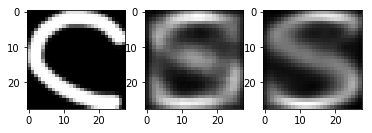

In [12]:
show(4000)